<a href="https://colab.research.google.com/github/sada1908/Complete-Python-3-Bootcamp/blob/master/building-a-brain/BuildingABrain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><a href="https://www.nvidia.com/en-us/training/"><img src="https://dli-lms.s3.amazonaws.com/assets/general/DLI_Header_White.png" width="400" height="186" /></a></center>




# Building a Brain in 10 Minutes

Many decades ago, artificial neural networks were developed to mimic the learning capabilities of humans and animals. Below is an excerpt from [The Machine that Changed the World](https://www.youtube.com/watch?v=enWWlx7-t0k&t=166s), a 1992 documentary about Artificial Intelligence.

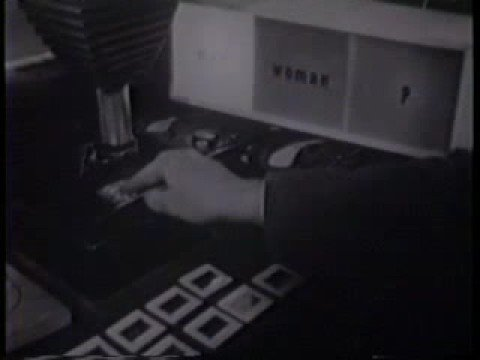

In [18]:
from IPython.display import YouTubeVideo
YouTubeVideo('cNxadbrN_aI')

Since then, computers and machine learning libraries have evolved to where we can replicate many days of experimentation in just a few minutes. In this notebook, we will step through how artificial neural networks have improved over the years and the biological inspiration behind it.

To demonstrate, we will be using [TensorFlow](https://www.tensorflow.org/), an open-source machine learning library popular in industry. Recent versions of TensorFlow automatically detect if there is a GPU available for computation.

In [19]:
import tensorflow as tf

tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

GPUs were originally designed for the significant amount of matrix mathematics used when rendering computer graphics. Neural networks also require a significant amount of matrix multiplication, making GPUs a good fit when building them.

## Data

Speaking of graphics, we're going to tackle a challenge that seemed almost impossible decades ago: image classification with computer vision. Specifically, we will try to classify articles of clothing from the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset. A few samples are shown below:

<center><img src="https://github.com/zalandoresearch/fashion-mnist/blob/master/doc/img/fashion-mnist-sprite.png?raw=true" width="400" /></center>

Neural networks attempt to copy the human learning technique, Trial and Error. To do this, we will create something like a set of digital flashcards. Our artificial brains will attempt to guess what kind of clothing we are showing it with a flashcard, then we will give it the answer, helping the computer learn from its successes and mistakes.

Just like how students are quizzed to test their understanding, we will set aside a portion of our data to quiz our neural networks to make sure they understand the concepts we're trying to teach them, as opposed to them memorizing the answers to their study questions. For trivia, memorization might be an acceptable strategy, but for skills, like adding two numbers, memorization won't get our models very far.

The study data is often called the `training dataset` and the quiz data is often called the `validation dataset`. As Fashion MNIST is a popular dataset, it is already included with the TensorFlow library. Let's load it into our coding environment and take a look at it.

In [20]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (valid_images, valid_labels) = fashion_mnist.load_data()

Let's start with our `train_images` and `train_labels`. `train_images` are like the question on our flashcards and `train_labels` are like the answer. In general, data scientists often refer to this answer as the `label`.

We can plot one of these images to see what it looks like. To do so, we will use [Matplotlib](https://matplotlib.org/).

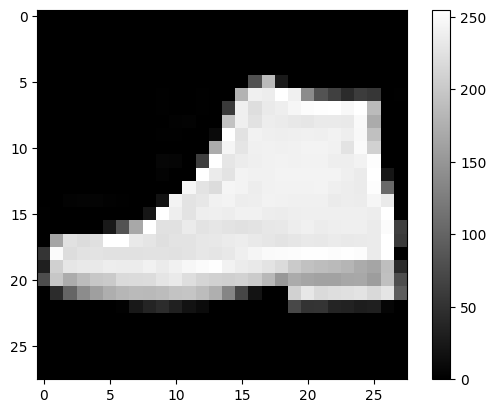

In [21]:
import matplotlib.pyplot as plt

# The question number to study with. Feel free to change up to 59999.
data_idx = 42

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

What would you classify this as? To make it easier, here are the ten categories it could be:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

Have an answer? Run the following code cell to see if you were correct:

In [25]:
train_labels[data_idx]

1

How did you do? Good job if you got it correct!

Our validation data has a similar structure of questions and answers:

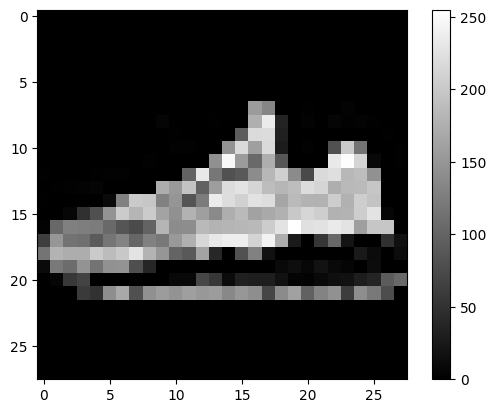

In [26]:
import matplotlib.pyplot as plt

# The question number to quiz with. Feel free to change up to 9999.
data_idx = 6174

plt.figure()
plt.imshow(valid_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [27]:
valid_labels[data_idx]

7

# Building a Neuron

Neurons are the fundamental building blocks to a neural network. Just like how biological neurons send an electrical impulse under specific stimuli, artificial neural networks similarly result in a numerical output with a given numerical input.

We can break down building a neuron into 3 steps:
- Defining the architecture
- Intiating training
- Evaluating the model

## Defining the architecture
<center>
<a title="BruceBlaus, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png"><img width="512" alt="Blausen 0657 MultipolarNeuron" src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/10/Blausen_0657_MultipolarNeuron.png/512px-Blausen_0657_MultipolarNeuron.png"></a>
<p><small>
Image courtesy of <a href="https://commons.wikimedia.org/wiki/File:Blausen_0657_MultipolarNeuron.png">Wikimedia Commons</a>
</small></p>
</center>

Biological neurons transmit information with a mechanism similar to [Morse Code](https://news.weill.cornell.edu/news/2007/09/scientists-find-clues-to-crack-brains-neural-code). It receives electrical signals through the dendrites, and under the right conditions, sends an electrical impulse down the axon and out through the terminals.

It is theorized the sequence and timing of these impulses play a large part of how information travels through the brain. Most artificial neural networks have yet to capture this timing aspect of biological neurons, and instead emulate the phenomenon with simpler mathematical formulas.


### The Math

Computers are built with discrete 0s and 1s whereas humans and animals are built on more continuous building blocks. Because of this, some of the first neurons attempted to mimic biological neurons with a linear regression function: `y = mx + b`. The `x` is like information coming in through the dendrites and the `y` is like the output through the terminals. As the computer guesses more and more answers to the questions we present it, it will update its variables (`m` and `b`) to better fit the line to the data it has seen.

Neurons are often exposed to multivariate data. We're going to build a neuron that takes each pixel value (which is between `0` and `255`), and assign it a weight, which is equivalent to our `m`. Data scientists often express this weight as `w`. For example, the first pixel will have a weight of `w0`, the second will have a weight of `w1`, and so on. Our full equation becomes `y = w0x0 + w1x1 + w2x2 + ... + b`.

Each image is 28 pixels by 28 pixels, so we will have a total of 784 weights. A pixel value of `0` would be black and a pixel value of `255` would be white. Let's look at the raw pixel values of the previous image we plotted. Each number below will be assigned a weight.

In [ ]:
# 28 lists with 28 values each
valid_images[data_idx]

One more thing to think about: the output of `y = mx + b` is a number, but here, we're trying to classify different articles of clothing. How might we convert numbers into categories?

Here is a simple approach: we can make ten neurons, one for each article of clothing. If the neuron assigned to "Trousers" (label #1), has the highest output compared to the other neurons, the model will guess "Trousers" for the given input image.

[Keras](https://keras.io/), a deep learning framework that has been integrated into TensorFlow, makes such a model easy to build. We will use the [Sequential API](https://keras.io/guides/sequential_model/), which allows us to stack [layers](https://keras.io/api/layers/), the list of operations we will be applying to our data as it is fed through the network.

In the below model, we have two layers:
* [Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) - Converts multidimensional data into 1 dimensional data (ex: a list of lists into a single list).
* [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) -  A "row" of neurons. Each neuron has a weight (`w`) for each input. In the example below, we use the number `10` to place ten neurons.

We will also define an `input_shape` which is the dimensions of our data. In this case, our `28x28` pixels for each image.

In [28]:
number_of_classes = train_labels.max() + 1
number_of_classes

10

In [29]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(number_of_classes)
])

### Verifying the model

To make sure our model has the structure we expect, we can call the [summary](https://www.tensorflow.org/js/guide/models_and_layers#model_summary) method.

In [30]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           7,850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,850 (30.66 KB)

 Trainable params: 7,850 (30.66 KB)

 Non-trainable params: 0 (0.00 B)

We can see that our total parameter count is `7850`. Let's see if this makes sense. For each pixel, there should be a weight for each of our ten classes.

In [31]:
image_height = 28
image_width = 28

number_of_weights = image_height * image_width * number_of_classes
number_of_weights

7840

So our weights make up `7,840` parameters. Where do the other ten come from? It's each of the `10` neurons biases, the `b` in `y = mx + b`.

There are a few other ways to verify our model. We can also [plot](https://keras.io/api/utils/model_plotting_utils/) it:

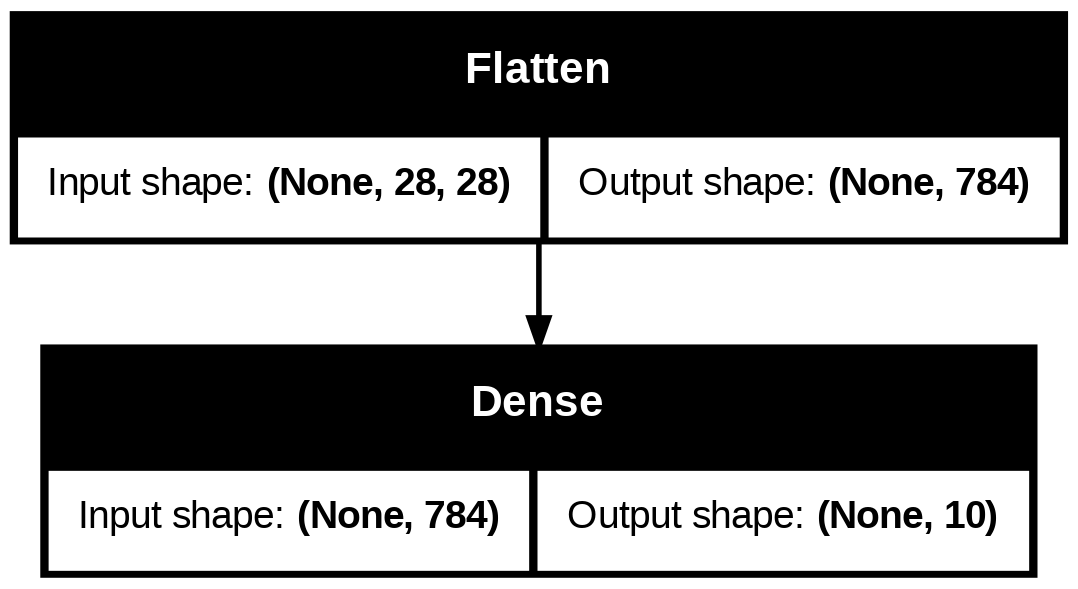

In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

In academic papers, models are often represented like the picture below. In practice, modern neural networks are so large, it's impractical to graph them in this way. The below is a fraction of our entire model. There are 10 neurons on the bottom representing each of our ten classes, and 28 input nodes on the top, representing a row of our pixels. In reality, the top layer is 28 times bigger!

Each circle represents a neuron or an input, and each line represents a weight. The below image was created with a tool by [Alex Lenail](http://alexlenail.me/NN-SVG/index.html).

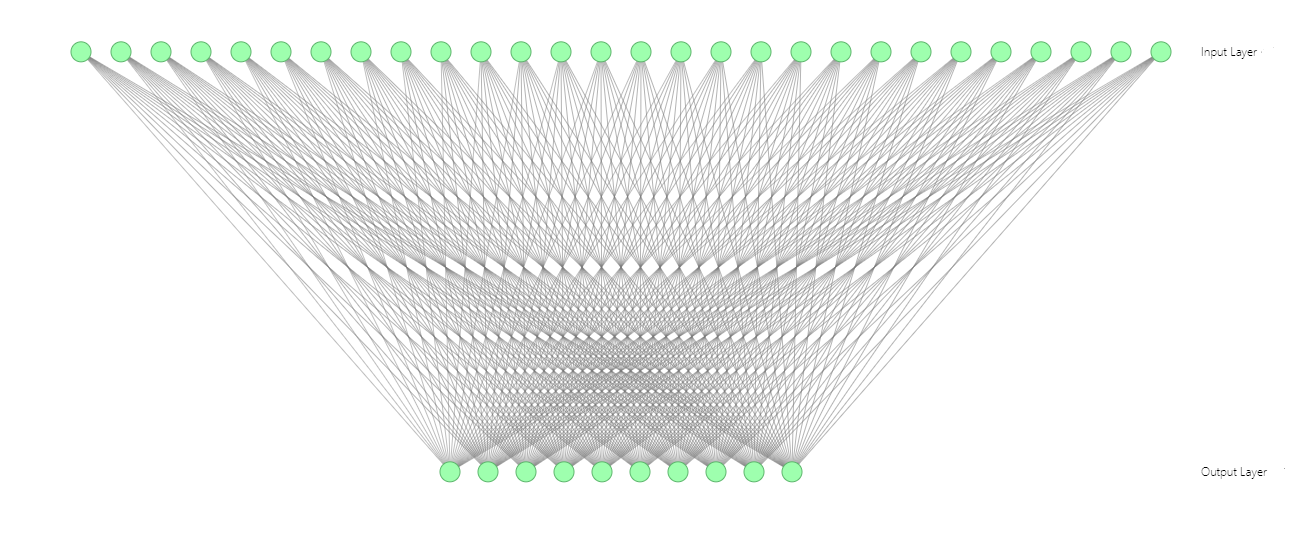

## Initiate Training

We have a model setup, but how does it learn? Just like how students are scored when they take a test, we need to give the model a function to grade its performance. Such a function is called the `loss` function.

In this case, we're going to use a type of function specific to classification called [SparseCategoricalCrossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy):
* **Sparse** - for this function, it refers to how our label is an integer index for our categories
* **Categorical** - this function was made for classification
* **Cross-entropy** - the more confident our model is when it makes an incorrect guess, the worse its score will be. If a model is 100% confident when it is wrong, it will have a score of negative infinity!
* `from_logits` - the linear output will be transformed into a probability which can be interpreted as the model's confidence that a particular category is the correct one for the given input.

This type of loss function works well for our case because it grades each of the neurons simultaneously. If all of our neurons give a strong signal that they're the correct label, we need a way to tell them that they can't all be right.

For us humans, we can add additional `metrics` to monitor how well our model is learning. For instance, maybe the loss is low, but what if the `accuracy` is not high?

In [33]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Evaluating the model

Now the moment of truth! The below [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) method will both help our model study and quiz it.

An `epoch` is one review of the training dataset. Just like how school students might need to review a flashcard multiple times before the concept "clicks", the same is true of our models.

After each `epoch`, the model is quizzed with the validation data. Let's watch it work hard and improve:

In [34]:
history = model.fit(
    train_images,
    train_labels,
    epochs=5,
    verbose=True,
    validation_data=(valid_images, valid_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6839 - loss: 25.5267 - val_accuracy: 0.7846 - val_loss: 12.4914
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7886 - loss: 11.8395 - val_accuracy: 0.7713 - val_loss: 14.2166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7982 - loss: 10.8614 - val_accuracy: 0.7597 - val_loss: 18.0424
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7975 - loss: 10.6977 - val_accuracy: 0.7982 - val_loss: 10.5762
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8073 - loss: 9.7224 - val_accuracy: 0.7917 - val_loss: 13.2170


How did the model do? B-? To give it credit, it only had `10` neurons to work with. Us humans have billions!

The accuracy should be around 80%, although there is some random variation based on how the flashcards are shuffled and the random value of the weights that were initiated.

### Prediction

Time to graduate our model and let it enter the real world. We can use the [predict](https://www.tensorflow.org/api_docs/python/tf/keras/Model#predict) method to see the output of our model on a set of images, regardless of if they were in the original datasets or not.

Please note, Keras expects a batch, or multiple datapoints, when making a prediction. To make a prediction on a single point of data, it should be converted to a batch of one datapoint.

Below are the predictions for the first ten items in our training dataset.

In [ ]:
model.predict(train_images[0:10])

These are raw results and need some formatting to be interpreted by the average human, so below, we've displayed an image to be classified as well as graph the results of each of our output neurons. The larger the value, the more confident the neuron is that it corresponds to the correct label (and the more negative it is, the more confident it is that it is **not** the correct label).

Alter the `data_idx` below to see how the model predicts against various images. How do you think it did? For the predictions it got wrong, would you have been confused too?

Here's the table again for reference:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

In [ ]:
data_idx = 8675 # The question number to study with. Feel free to change up to 59999.

plt.figure()
plt.imshow(train_images[data_idx], cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

x_values = range(number_of_classes)
plt.figure()
plt.bar(x_values, model.predict(train_images[data_idx:data_idx+1]).flatten())
plt.xticks(range(10))
plt.show()

print("correct answer:", train_labels[data_idx])

# Conclusion

Congratulations on completing the notebook! While this model does significantly better than random guessing, it has a way to go before it can beat humans at recognizing clothing. Want to make computer vision models that can surpass humans in image classification? Learn more about the mechanics of neural networks and how to make more accurate models in our self-paced [Getting Started with Deep Learning](https://courses.nvidia.com/courses/course-v1:DLI+S-FX-01+V1/about) online course.

<center><a href="https://www.nvidia.com/en-us/training/"><img src="https://dli-lms.s3.amazonaws.com/assets/general/DLI_Header_White.png" width="400" height="186" /></a></center>